In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('car_price_regression/focus.csv')
df

,model,year,price,transmission,mileage,fuelType,engineSize
0,Focus,2016,8000,Manual,38852,Petrol,1.0
1,Focus,2019,13400,Manual,11952,Petrol,1.0
2,Focus,2019,14600,Manual,22142,Petrol,1.5
3,Focus,2016,9450,Manual,14549,Diesel,1.6
4,Focus,2015,9999,Manual,7010,Diesel,1.6
...,...,...,...,...,...,...,...
5449,Focus,2019,18745,Manual,7855,Diesel,2.0
5450,Focus,2019,16350,Manual,13891,Petrol,1.0
5451,Focus,2019,16850,Manual,13452,Petrol,1.0
5452,Focus,2019,17310,Automatic,13376,Petrol,1.0


# Objetivo: <u>Entender</u> como as variáveis influenciam no preço de venda

<hr />

In [3]:
df.model.value_counts(dropna=False)

 Focus    5454
Name: model, dtype: int64

 - Variável sem variabilidade: Descartada

In [4]:
df = df.drop('model', axis=1)

In [5]:
df.transmission.value_counts(dropna=False)

Manual       4664
Automatic     635
Semi-Auto     155
Name: transmission, dtype: int64

In [6]:
df.fuelType.value_counts(dropna=False)

Petrol    3545
Diesel    1909
Name: fuelType, dtype: int64

 - Assim como na Regressão Logística, como as variáveis não são **ordinais**, faremos um one-hot encoding para entender o impacto de **cada** categoria

In [7]:
df_onehot = pd.get_dummies(df, drop_first=True)
df_onehot

,year,price,mileage,engineSize,transmission_Manual,transmission_Semi-Auto,fuelType_Petrol
0,2016,8000,38852,1.0,1,0,1
1,2019,13400,11952,1.0,1,0,1
2,2019,14600,22142,1.5,1,0,1
3,2016,9450,14549,1.6,1,0,0
4,2015,9999,7010,1.6,1,0,0
...,...,...,...,...,...,...,...
5449,2019,18745,7855,2.0,1,0,0
5450,2019,16350,13891,1.0,1,0,1
5451,2019,16850,13452,1.0,1,0,1
5452,2019,17310,13376,1.0,0,0,1


In [8]:
X = df_onehot.drop('price',axis=1)
y = df_onehot.price

# Como é a distribuição da variável resposta?

(array([ 36.,  79., 100., 346., 477., 822., 828., 591., 761., 750., 405.,
        113.,  31.,  28.,  29.,  48.,   7.,   1.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([  495.        ,  2311.66666667,  4128.33333333,  5945.        ,
         7761.66666667,  9578.33333333, 11395.        , 13211.66666667,
        15028.33333333, 16845.        , 18661.66666667, 20478.33333333,
        22295.        , 24111.66666667, 25928.33333333, 27745.        ,
        29561.66666667, 31378.33333333, 33195.        , 35011.66666667,
        36828.33333333, 38645.        , 40461.66666667, 42278.33333333,
        44095.        , 45911.66666667, 47728.33333333, 49545.        ,
        51361.66666667, 53178.33333333, 54995.        ]),
 <BarContainer object of 30 artists>)

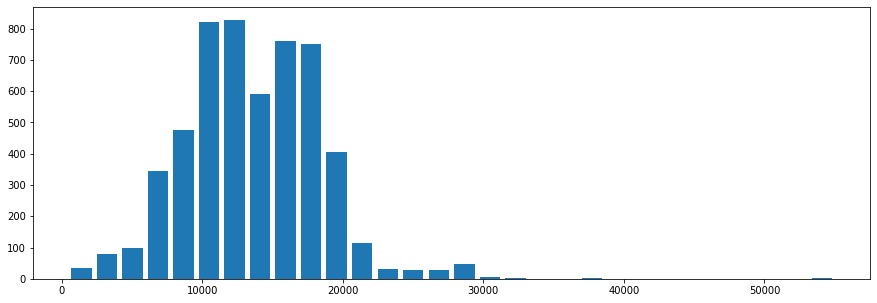

In [9]:
plt.figure(figsize=(15,5))
plt.hist(y, bins=30, rwidth=.8)

# Temos outliers!

Vamos ver melhor:

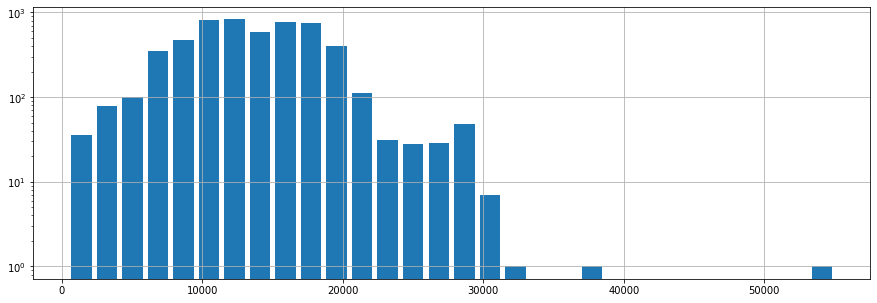

In [10]:
plt.figure(figsize=(15,5))
plt.hist(y, bins=30, rwidth=.8, log=True)
plt.grid()

# Segura essa emoção, já vamos ver o impacto disso

# Agora vamos treinar o modelo

In [11]:
from sklearn.model_selection import train_test_split

X_tr, X_ts, y_tr, y_ts = train_test_split(X,y, test_size=.3, random_state=61658)

In [12]:
X_tr.shape, X_ts.shape

((3817, 6), (1637, 6))

# As variáveis precisam estar em <u>escalas comparáveis</u>

 - Isso é uma "limitação" dos otimizadores internos da Regressão Linear
 
Para isso, vamos **normalizar os dados**
$$
X_{novo} = \frac{X - média(X)}{std(X)}
$$

Isso vai ajudar a gente a **interpretar** o modelo

In [13]:
X_tr_s = X_tr.copy()
X_ts_s = X_ts.copy()

from sklearn.preprocessing import StandardScaler

cols_to_scale = [
    'year',
    'mileage',
    'engineSize',
]
scalers = {}

for col in cols_to_scale:
    scalers[col] = StandardScaler()
    scalers[col].fit(X_tr_s[[col]])
    
    X_tr_s.loc[:,col] = scalers[col].transform(X_tr_s[[col]])
    X_ts_s.loc[:,col] = scalers[col].transform(X_ts_s[[col]])

In [14]:
X_tr_s

,year,mileage,engineSize,transmission_Manual,transmission_Semi-Auto,fuelType_Petrol
1039,-0.955057,0.975516,0.329983,1,0,0
1497,-0.039459,-0.072012,1.575824,1,0,0
4574,-0.955057,0.350963,1.575824,1,0,1
2860,-0.039459,-0.564356,1.575824,1,0,1
1710,0.876138,-0.574894,-0.915858,0,0,1
...,...,...,...,...,...,...
483,0.876138,-0.953010,-0.915858,1,0,1
4184,-0.955057,2.653544,0.579151,1,0,0
614,0.876138,-0.780242,0.329983,1,0,1
3836,-0.955057,1.155003,1.575824,1,0,1


# E vamos finalmente ajustar o modelo!

In [15]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression(
    fit_intercept=True,
    normalize=False,
    n_jobs=3,
)

lr.fit(X_tr_s, y_tr)

LinearRegression(n_jobs=3)

In [16]:
y_pred = lr.predict(X_ts_s)

# Meu modelo está bom?

# A métricas mais comuns em regressão são o MSE e o MAE

In [17]:
from sklearn.metrics import mean_squared_error

np.sqrt( mean_squared_error(y_ts, y_pred) )

2113.5835251718368

In [18]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_ts, y_pred)

1394.2238873392298

# Um erro médio de 1400 dólares pra um carro não parece muito gritante, parece bem ok

 - Mas há uma limitação em olhar só pra média!

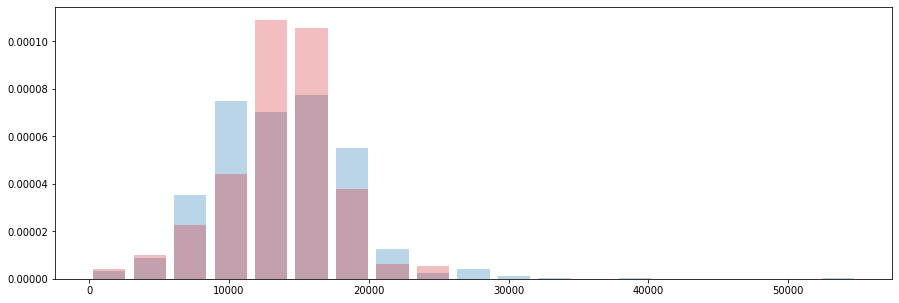

In [19]:
plt.figure(figsize=(15,5))

M = y_ts.max()

plt.hist(y_ts  , bins=np.linspace(0,M,20), rwidth=.8, alpha=.3, color='C0', density=True)
plt.hist(y_pred, bins=np.linspace(0,M,20), rwidth=.8, alpha=.3, color='C3', density=True);

# Modelo tem tendência de concentrar precificação em 15k

(array([  1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   4.,   4.,  13.,
         79., 537., 877., 121.]),
 array([-33102.76130844, -30576.45507674, -28050.14884505, -25523.84261336,
        -22997.53638166, -20471.23014997, -17944.92391827, -15418.61768658,
        -12892.31145489, -10366.00522319,  -7839.6989915 ,  -5313.3927598 ,
         -2787.08652811,   -260.78029642,   2265.52593528,   4791.83216697]),
 <BarContainer object of 15 artists>)

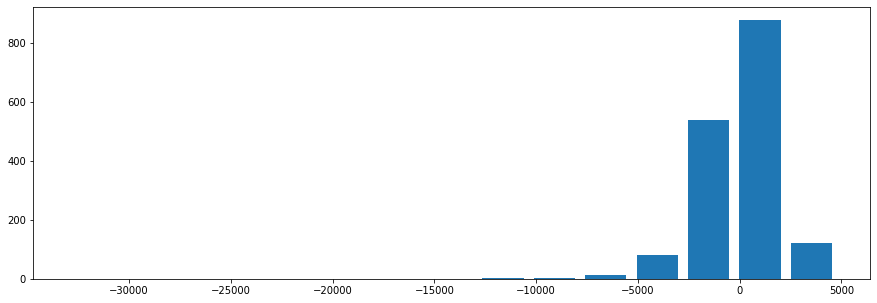

In [20]:
plt.figure(figsize=(15,5))

plt.hist(y_pred-y_ts, bins=15, rwidth=.8, density=False)

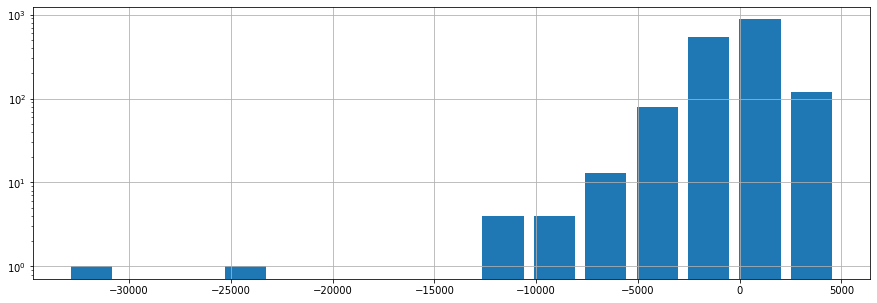

In [21]:
plt.figure(figsize=(15,5))

plt.hist(y_pred-y_ts, bins=15, rwidth=.8, density=False, log=True)
plt.grid()

# Viu o efeito daquele nosso outlier?

<hr />

# Ok, mas como interpretar?

In [22]:
lr.intercept_

12787.799519157741

In [23]:
lr.coef_

array([ 2879.4927325 , -1248.99540827,  2436.37404227,  -843.14949219,
       -1882.46855829,  2351.52658558])

In [24]:
for col,coef in zip(X_tr.columns, lr.coef_):
    print(f'{col:50s} : {coef:7.3f}')

year                                               : 2879.493
mileage                                            : -1248.995
engineSize                                         : 2436.374
transmission_Manual                                : -843.149
transmission_Semi-Auto                             : -1882.469
fuelType_Petrol                                    : 2351.527


# A equação do preço é:

$$
y = \beta_0 + \beta_{ano} \cdot ano + \beta_{mileage} \cdot mileage + \beta_{engineSize} \cdot engineSize + \beta_{Trans.Manual} \cdot Trans.Manual + \beta_{Trans.Semi} \cdot Trans.Semi + \beta_{fuel.Petrol} \cdot fuel.Petrol
$$

# Ok, mas o que significa esse $\beta_0$?

Carro com todas variáveis zeradas!
 - Lembre-se da normalização
 - E do one-hot!
   - câmbio automático
   - combustível diesel

# Como é o "carro padrão"?

In [25]:
print( 'year ', scalers['year'].mean_, scalers['year'].scale_ )
print( 'mileage ', scalers['mileage'].mean_, scalers['mileage'].scale_ )
print( 'engineSize ', scalers['engineSize'].mean_, scalers['engineSize'].scale_ )

year  [2017.08619335] [2.18436596]
mileage  [23106.70605187] [20686.78450964]
engineSize  [1.36756615] [0.40133543]


# O carro padrão é:

 - Um carro de **$2017$**
 
 - Com **$23106$ milhas rodadas**
 
 - Com tamanho de motor de **$1.367$**
 
 - Câmbio **automático**
 
 - Combustível a **diesel**
 
 
E este carro, segundo o modelo, custa **$12788$**

# Interpretação sobre o impacto da variável `mileage`:

In [26]:
scalers['mileage'].mean_, scalers['mileage'].scale_

(array([23106.70605187]), array([20686.78450964]))

 - Um carro com milhagem de <u>exatamente</u> $23106$ não sofre impacto dessa variável
 
 
 - Carros com milhagens **menores** que esse valor tem a predição do preço **aumentada**
   - A cada 20_686 milhas, o carro encarece $1248$
   
   
 - Carros com milhagens **maiores** que esse valor tem a predição do preço **reduzida**
   - A cada 20_686 milhas, o carro barateia $1248$

# Interpretação sobre a variável `transmission`

### Repetindo as variáveis, pra facilitar

In [27]:
for col,coef in zip(X_tr.columns, lr.coef_):
    print(f'{col:50s} : {coef:7.3f}')

year                                               : 2879.493
mileage                                            : -1248.995
engineSize                                         : 2436.374
transmission_Manual                                : -843.149
transmission_Semi-Auto                             : -1882.469
fuelType_Petrol                                    : 2351.527


 - Carros automáticos não sofrem alteração no preço (isso está embutido no interceto - "Carro padrão")
 
 - Carros semi-automáticos têm uma redução da predição de $1882$
 
 - Carros manuais têm uma redução da predição de $843$

# Vamos ver com uma lupa aquele OutLier?

(array([4.25213481e-06, 9.99251680e-06, 2.27489212e-05, 4.40095953e-05,
        1.09067258e-04, 1.05665550e-04, 3.78439998e-05, 6.37820221e-06,
        5.52777525e-06, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]),
 array([    0.        ,  2894.47368421,  5788.94736842,  8683.42105263,
        11577.89473684, 14472.36842105, 17366.84210526, 20261.31578947,
        23155.78947368, 26050.26315789, 28944.73684211, 31839.21052632,
        34733.68421053, 37628.15789474, 40522.63157895, 43417.10526316,
        46311.57894737, 49206.05263158, 52100.52631579, 54995.        ]),
 <BarContainer object of 19 artists>)

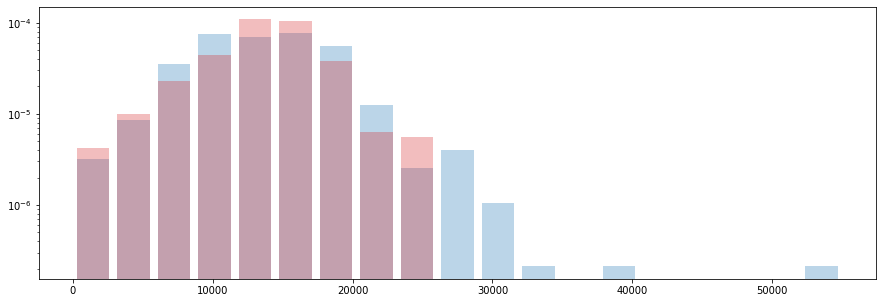

In [28]:
plt.figure(figsize=(15,5))

M = y_ts.max()

plt.hist(y_ts  , bins=np.linspace(0,M,20), rwidth=.8, alpha=.3, color='C0', density=True, log=True)
plt.hist(y_pred, bins=np.linspace(0,M,20), rwidth=.8, alpha=.3, color='C3', density=True, log=True)

# plt.grid()

### Lembrando do carro padrão:
 
 - Um carro de **$2017$**
 
 - Com **$23106$ milhas rodadas**
 
 - Com tamanho de motor de **$1.367$**
 
 - Câmbio **automático**
 
 - Combustível a **diesel**
 
 
E este carro, segundo o modelo, custa **$12788$**

In [29]:
y_ts[ y_ts>50_000 ]

3342    54995
Name: price, dtype: int64

In [30]:
X_ts.loc[ y_ts>50_000 ]

,year,mileage,engineSize,transmission_Manual,transmission_Semi-Auto,fuelType_Petrol
3342,2018,11000,2.3,1,0,1


In [31]:
y_pred[y_ts>50_000]

array([21892.23869156])

# É realmente um carro em bom estado. A base, aparentemente, não nos fornece mais informações pra justificar essa venda tão discrepante!

In [32]:
!pwd

/home/rafael/OneDrive/Projeto  Rafael/Produtos/Curso ML Descomplicado/Modulo 4 - Regressao/material de apoio/Regressao Linear pratica
